In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def cv2_imshow(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axis
    plt.show()

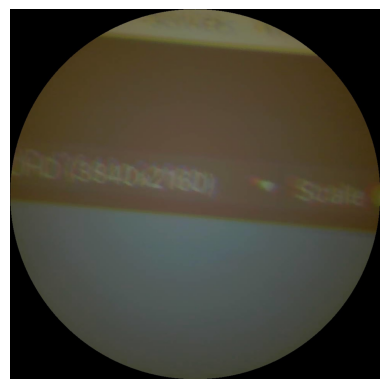

In [40]:
# Capture video from the webcam or a video file
frame = cv2.imread("Images//error//err_2024_08_24 16_52_15.jpg")  # Change to the video file path if needed
cv2_imshow(frame)

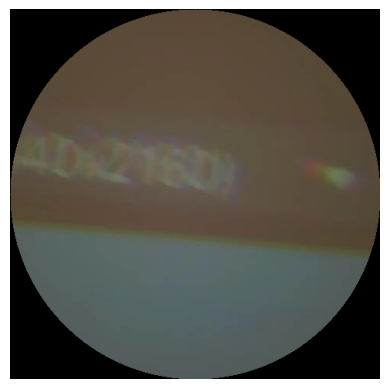

In [41]:
# Get image dimensions
height, width = frame.shape[:2]

# Calculate the center and radius for the circular crop
center_x, center_y = width // 2, height // 2
radius = min(center_x, center_y, width//4)  # Radius is limited by the smallest dimension

# Create a circular mask
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, (center_x, center_y), radius, (255, 255, 255), -1)  # White-filled circle

# Apply the mask to get the circular cropped area
circular_crop = cv2.bitwise_and(frame, frame, mask=mask)

# Crop the rectangular bounding box around the circle
x1, y1 = center_x - radius, center_y - radius
x2, y2 = center_x + radius, center_y + radius
frame = circular_crop[y1:y2, x1:x2]
cv2_imshow(frame)

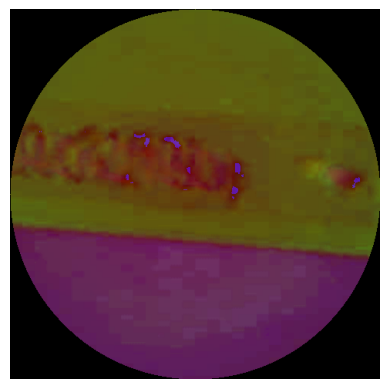

In [42]:
# Convert the frame to HSV color space
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv)

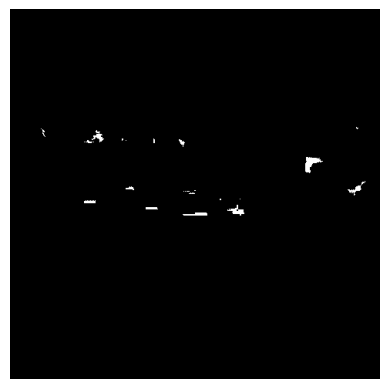

In [70]:
# Define the lower and upper range for the color red in HSV
lower_red = np.array([0, 60, 50])
upper_red = np.array([10, 255, 255])

# Create a mask for red color
mask1 = cv2.inRange(hsv, lower_red, upper_red)
cv2_imshow(mask1)

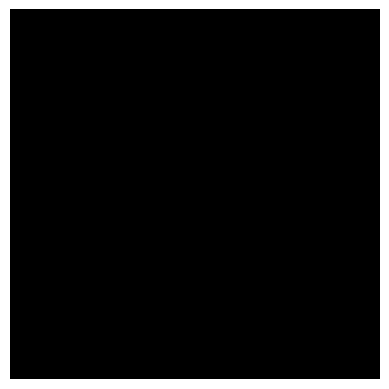

In [71]:
# To capture the red color in another range (for better detection)
lower_red = np.array([170, 60, 50])
upper_red = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lower_red, upper_red)
cv2_imshow(mask2)

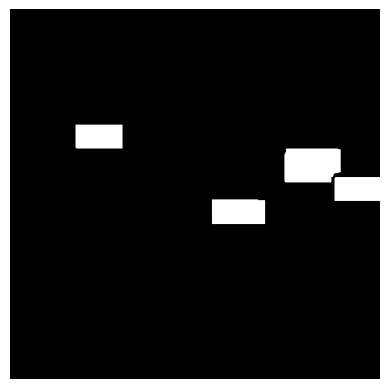

In [72]:
# Combine both masks
mask = mask1 | mask2

# Apply a series of dilations and erosions to remove small blobs
kernel_1 = np.ones((5, 5), np.uint8)  # You can adjust the kernel size (5, 5) for different effects
mask = cv2.erode(mask, kernel_1, iterations=1)
kernel_2 = np.ones((30, 60), np.uint8)  # You can adjust the kernel size (5, 5) for different effects
mask = cv2.dilate(mask, kernel_2, iterations=1)
cv2_imshow(mask)

3212
1.6590909090909092


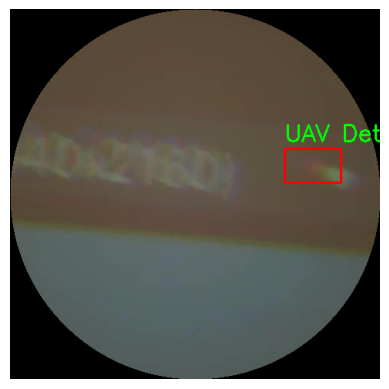

In [74]:
# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output_frame = frame.copy()
# Loop over the contours
for contour in contours:
    # Compute the area of the contour
    x, y, w, h = cv2.boundingRect(contour)
    area = w*h
    # Set a minimum area threshold to filter out small objects
    if 20000 > area > 3000:  # Adjust this threshold based on your use case
         # Calculate aspect ratio (width/height) to ensure it matches the UAV shape
        aspect_ratio = float(w) / h
        print(area)
        print(aspect_ratio)
        if 1.3 < aspect_ratio < 3.7:  # Adjust based on your UAV shape
            cv2.rectangle(output_frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(output_frame, "UAV Detected", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

cv2_imshow(output_frame)